# Проект: Оптимизация производственных расходов металлургического комбината "Стальная птица" при потребление электроэнергии на этапе обработки стали.

# Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Наша задача — построить модель, которая будет её предсказывать.

Заказчик хочет использовать разработанную модель для имитации технологического процесса.

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.

Из сплава выводится сера (этот процесс — десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (от англ. tribe — «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (от англ. slab — «плита»).

**Цель**

Объект моделирования — один ковш (один процесс варки).

Необходимо построить модель, которая позволит снизить затраты на электричество, обслуживание и ремонты, за счет предсказания температуры сплава.

● Целевая переменная target - последняя температура по всей партии 

● Целевая метрика -  MAE (нужно получить не более 6.8 на тесте). 

**Описание данных**

Данные состоят из нескольких файлов, полученных из разных источников:

/datasets/data_arc_new.csv — данные об электродах:

- key — номер партии;
- Начало нагрева дугой — время начала нагрева;
- Конец нагрева дугой — время окончания нагрева;
- Активная мощность — значение активной мощности;
- Реактивная мощность — значение реактивной мощности.

/datasets/data_bulk_new.csv — данные о подаче сыпучих материалов (объём):

- key — номер партии;
- Bulk 1 … Bulk 15 — объём подаваемого материала.

/datasets/data_bulk_time_new.csv — данные о подаче сыпучих материалов (время):

- key — номер партии;
- Bulk 1 … Bulk 15 — время подачи материала.

/datasets/data_gas_new.csv — данные о продувке сплава газом:

- key — номер партии;
- Газ 1 — объём подаваемого газа.

/datasets/data_temp_new.csv — результаты измерения температуры:

- key — номер партии;
- Время замера — время замера;
- Температура — значение температуры.

/datasets/data_wire_new.csv — данные о проволочных материалах (объём):

- key — номер партии;
- Wire 1 … Wire 15 — объём подаваемых проволочных материалов.

/datasets/data_wire_time_new.csv — данные о проволочных материалах (время).

- key — номер партии;
- Wire 1 … Wire 15 — время подачи проволочных материалов.

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

**План работы**

1. Загрузка данных:

Загрузим данные и выполним их первичный осмотр.

2. Исследовательский анализ и предобработка данных:

Выполним исследовательский анализ каждого датафрейма и при необходимости выполним предобработку. Сделаем выводы об имеющихся признаках: понадобятся ли они для обучения моделей.

3. Объединение данных:

Объединим выбранные нами признаки в один датафрейм по ключу.

4. Исследовательский анализ и предобработка данных объединённого датафрейма:

Выполним исследовательский анализ объединённого датафрейма, визуализируем распределения признаков и при необходимости выполним предобработку. Проведем корреляционный анализ. Мы можем использовать не только имеющиеся признаки, но и генерировать новые.

5. Подготовка данных:

Выполним подготовку данных для обучения модели. Разделим данные на две выборки, при масштабировании и кодировании учтем особенности данных и моделей.

6. Обучение моделей машинного обучения:

Обучим как минимум две модели. Хотя бы для одной из них подберем как минимум два гиперпараметра.

7. Выбор лучшей модели:

Выберем лучшую модель и проверим её качество на тестовой выборке. Целевая метрика -  MAE (нужно получить не более 6.8 на тесте). Для лучшей модели дополнительно  рассчитаем метрику r2  на тестовой выборке и интерпретировать ее.

8. Сравним с моделью DummyRegressor:

Сравним с константной моделью DummyRegressor (обучим на трейне, предсказываем на тестовой выборке).

9. Исследуем важность признаков:

Исследуем важность признаков у лучшей модели и напишем отдельный вывод по важности признаков.

10. Общий вывод и рекомендации заказчику:

Сделаем общий вывод о проделанной работе: опишем основные этапы работы, полученные результаты и дадим рекомендации для бизнеса.

# 1. Загрузка данных.

In [1]:
pip install numpy==1.23

     |████████████████████████████████| 17.1 MB 1.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.23.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

pd.options.display.float_format = '{:,.2f}'.format

RANDOM_STATE = 130125

In [3]:
data_arc = pd.read_csv('/datasets/data_arc_new.csv')
data_bulk= pd.read_csv('/datasets/data_bulk_new.csv')
data_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv')
data_gas = pd.read_csv('/datasets/data_gas_new.csv')
data_temp = pd.read_csv('/datasets/data_temp_new.csv')
data_wire = pd.read_csv('/datasets/data_wire_new.csv')
data_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv')

In [4]:
def check_df(df):    
    display(df.info())   
    display(df.head())
    display(df.describe())
    display(df.isna().sum())   
    display(df.duplicated().sum())

In [5]:
def hist_box_plot(df, column):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], color='Green', kde=True, bins=50)
    plt.title(f'Гистограмма {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Количество')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='Red')
    plt.title(f'Диаграмма рассеяния {column}')
    plt.ylabel('Количество')

# 2. Исследовательский анализ и предобработка данных каждого датафрейма.

## 2.1 Анализ data_arc - данные об электродах.

In [6]:
check_df(data_arc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.31,0.21
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.77,0.48
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.58,0.43
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.52,0.38
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.87,0.64


,key,Активная мощность,Реактивная мощность
count,"14,876.00","14,876.00","14,876.00"
mean,"1,615.22",0.66,0.44
std,934.57,0.26,5.87
min,1.00,0.22,-715.48
25%,806.00,0.47,0.34
50%,"1,617.00",0.60,0.44
75%,"2,429.00",0.83,0.61
max,"3,241.00",1.46,1.27


key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

0

В датафрейме data_arc 14876 строк, пропусков и дубликатов нет. Есть отрицательное значение реактивной мощности, что является аномалией, которую необходимо удалить. Тип данных в колонках начало и конец нагрева дугой не соответсвует данным, необхоимо изменить тип данных. Также нужно привести название колонок к единому регистру.

Удалим отрицательные значения.

In [7]:
data_arc = data_arc[data_arc['Реактивная мощность'] >= 0]

Изменим тип данный в колонках начало и конец нагрева дугой.

In [8]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'], format='%Y-%m-%dT%H:%M:%S')
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%dT%H:%M:%S')

Приведем названия колонок к "змеиному" регистру.

In [9]:
data_arc_columns = {
    'Начало нагрева дугой': 'начало_нагрева_дугой',
    'Конец нагрева дугой': 'конец_нагрева_дугой',
    'Активная мощность': 'активная_мощность',
    'Реактивная мощность': 'реактивная_мощность',
}
data_arc = data_arc.rename(columns=data_arc_columns)

Проверим, что получилось.

In [10]:
data_arc.head()

,key,начало_нагрева_дугой,конец_нагрева_дугой,активная_мощность,реактивная_мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.31,0.21
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.77,0.48
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.58,0.43
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.52,0.38
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.87,0.64


In [11]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14875 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14875 non-null  int64         
 1   начало_нагрева_дугой  14875 non-null  datetime64[ns]
 2   конец_нагрева_дугой   14875 non-null  datetime64[ns]
 3   активная_мощность     14875 non-null  float64       
 4   реактивная_мощность   14875 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 697.3 KB


In [12]:
data_arc.describe()

,key,активная_мощность,реактивная_мощность
count,"14,875.00","14,875.00","14,875.00"
mean,"1,615.19",0.66,0.49
std,934.59,0.26,0.20
min,1.00,0.22,0.15
25%,806.00,0.47,0.34
50%,"1,617.00",0.60,0.44
75%,"2,429.00",0.83,0.61
max,"3,241.00",1.46,1.27


Проведем исследовательский анализ, построив диаграммы.

In [13]:
data_arc_num = ['активная_мощность', 
                'реактивная_мощность']

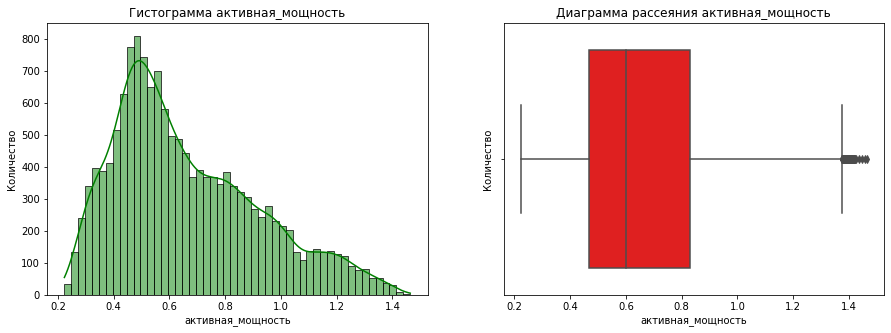

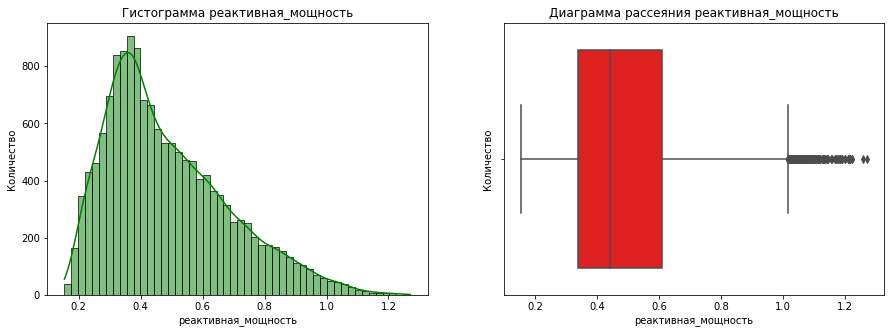

In [14]:
for column in data_arc_num:
    hist_box_plot(data_arc, column)

По диаграммам рассеяния наблюдаются выбросы, но удалять их не будем. Активная и реакция мощность практически одинаковые, с отклонением в несколько сотых или десятых. Проверим корреляцию между признаками.

In [15]:
data_arc['активная_мощность'].corr(data_arc['реактивная_мощность'])

0.9663734456187308

Корреляция высокая, есть смысл из посчитать полную мощность. 

Полная мощность равно геометрической сумме векторов активной и реактивной мощностей.

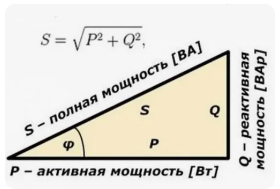

Полная мощность вычисляется по формуле:

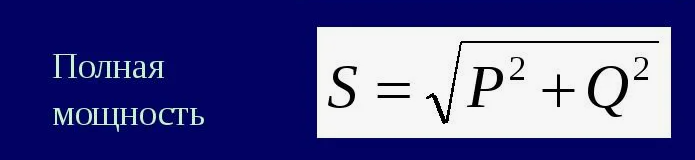


In [16]:
data_arc['полная_мощность'] = (data_arc['активная_мощность']**2 + data_arc['реактивная_мощность']**2)**0.5

Теперь посчитаем общее время нагрева на каждую партию.

In [17]:
data_arc['общее_время_нагрева'] = data_arc['конец_нагрева_дугой'] - data_arc['начало_нагрева_дугой']
data_arc['общее_время_нагрева'] = data_arc['общее_время_нагрева'].dt.seconds
data_arc.head()

,key,начало_нагрева_дугой,конец_нагрева_дугой,активная_мощность,реактивная_мощность,полная_мощность,общее_время_нагрева
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.31,0.21,0.37,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.77,0.48,0.90,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.58,0.43,0.72,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.52,0.38,0.64,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.87,0.64,1.08,148


Посчитаем количество итераций каждой партии.

In [18]:
key_rounds = data_arc['key'].value_counts().reset_index(
    name='количество_итераций').rename(
    columns={'index': 'key'}
)

In [19]:
data_arc = data_arc.groupby(by = 'key').sum()
data_arc = data_arc.merge(key_rounds, on='key')
data_arc.head(5)

,key,активная_мощность,реактивная_мощность,полная_мощность,общее_время_нагрева,количество_итераций
0,1,3.04,2.14,3.72,1098,5
1,2,2.14,1.45,2.59,811,4
2,3,4.06,2.94,5.02,655,5
3,4,2.71,2.06,3.40,741,4
4,5,2.25,1.69,2.82,869,4


## 2.2 Анализ data_bulk - данные о подаче сыпучих материалов (объём).

In [20]:
check_df(data_bulk)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.00,NaN,150.00,154.00
1,2,NaN,NaN,NaN,73.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.00,NaN,149.00,154.00
2,3,NaN,NaN,NaN,34.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.00,NaN,152.00,153.00
3,4,NaN,NaN,NaN,81.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.00,NaN,153.00,154.00
4,5,NaN,NaN,NaN,78.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.00,NaN,151.00,152.00


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,"3,129.00",252.00,22.00,"1,298.00","1,014.00",77.00,576.00,25.00,1.00,19.00,176.00,177.00,"2,450.00",18.00,"2,806.00","2,248.00"
mean,"1,624.38",39.24,253.05,113.88,104.39,107.03,118.93,305.60,49.00,76.32,83.28,76.82,260.47,181.11,170.28,160.51
std,933.34,18.28,21.18,75.48,48.18,81.79,72.06,191.02,NaN,21.72,26.06,59.66,120.65,46.09,65.87,51.77
min,1.00,10.00,228.00,6.00,12.00,11.00,17.00,47.00,49.00,63.00,24.00,8.00,53.00,151.00,16.00,1.00
25%,816.00,27.00,242.00,58.00,72.00,70.00,69.75,155.00,49.00,66.00,64.00,25.00,204.00,153.25,119.00,105.00
50%,"1,622.00",31.00,251.50,97.50,102.00,86.00,100.00,298.00,49.00,68.00,86.50,64.00,208.00,155.50,151.00,160.00
75%,"2,431.00",46.00,257.75,152.00,133.00,132.00,157.00,406.00,49.00,70.50,102.00,106.00,316.00,203.50,205.75,205.00
max,"3,241.00",185.00,325.00,454.00,281.00,603.00,503.00,772.00,49.00,147.00,159.00,313.00,"1,849.00",305.00,636.00,405.00


key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

0

В датафрейме data_bulk 3129 строк. Много пропусков, что говорит о том, что сыпучие материалы добавляли далеко не во все партии. На данном этапе пропуски заполним значением 0, после объедиения таблиц удалим признаки bulk 1, 2, 5, 7, 8, 9, 10, 11, 13, так как в данных колонках более 80% пропусков.  Дубликатов нет. Отрицательных аномальных значений не наблюдается. Приведем к единому регистру название колонок.

Заполним пропуски значение 0.

In [21]:
data_bulk = data_bulk.fillna(0)

Приведем названия колонок к "змеиному" регистру.

In [22]:
data_bulk_columns = {
    'Bulk 1': 'bulk_1',
    'Bulk 2': 'bulk_2',
    'Bulk 3': 'bulk_3',
    'Bulk 4': 'bulk_4',
    'Bulk 5': 'bulk_5',
    'Bulk 6': 'bulk_6',
    'Bulk 7': 'bulk_7',
    'Bulk 8': 'bulk_8',
    'Bulk 9': 'bulk_9',
    'Bulk 10': 'bulk_10',
    'Bulk 11': 'bulk_11',
    'Bulk 12': 'bulk_12',
    'Bulk 13': 'bulk_13',
    'Bulk 14': 'bulk_14',
    'Bulk 15': 'bulk_15',
}

data_bulk = data_bulk.rename(columns=data_bulk_columns)

data_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.00,0.00,0.00,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,150.00,154.00
1,2,0.00,0.00,0.00,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,0.00,149.00,154.00
2,3,0.00,0.00,0.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,205.00,0.00,152.00,153.00
3,4,0.00,0.00,0.00,81.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,207.00,0.00,153.00,154.00
4,5,0.00,0.00,0.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,203.00,0.00,151.00,152.00


Изменим тип данных, чтобы убрать лишние нули. 

In [23]:
data_bulk = data_bulk.astype('int')
data_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0,0,0,43,0,0,0,0,0,0,0,206,0,150,154
1,2,0,0,0,73,0,0,0,0,0,0,0,206,0,149,154
2,3,0,0,0,34,0,0,0,0,0,0,0,205,0,152,153
3,4,0,0,0,81,0,0,0,0,0,0,0,207,0,153,154
4,5,0,0,0,78,0,0,0,0,0,0,0,203,0,151,152


Выведем диаграммы рассеяния для всех загрузок.

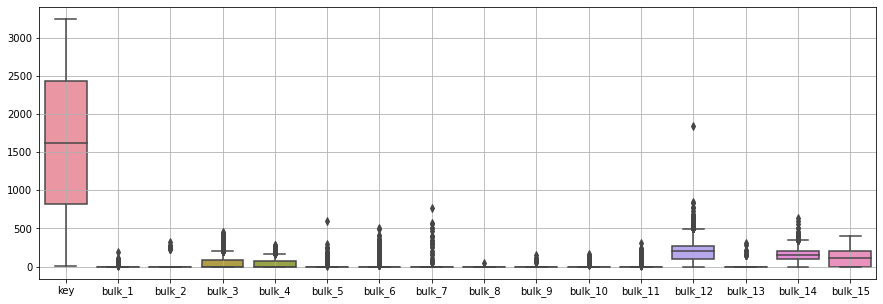

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data_bulk)
plt.grid();

Как видим, во многих загрузках сыпучие матеарилы добавлялись совсем в малых количествах. 

## 2.3 Анализ data_bulk_time - данные о подаче сыпучих материалов (время).

In [25]:
check_df(data_bulk_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


,key
count,"3,129.00"
mean,"1,624.38"
std,933.34
min,1.00
25%,816.00
50%,"1,622.00"
75%,"2,431.00"
max,"3,241.00"


key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

0

Данная таблица с временем подачи в итоговую таблицу не пойдут, нужны они только для проверки корректности данных. 

## 2.4 Анализ data_gas - данные о продувке сплава газом.

In [26]:
check_df(data_gas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

,key,Газ 1
0,1,29.75
1,2,12.56
2,3,28.55
3,4,18.84
4,5,5.41


,key,Газ 1
count,"3,239.00","3,239.00"
mean,"1,621.86",11.00
std,935.39,6.22
min,1.00,0.01
25%,812.50,7.04
50%,"1,622.00",9.84
75%,"2,431.50",13.77
max,"3,241.00",78.00


key      0
Газ 1    0
dtype: int64

0

В датафрейме data_gas 3129 строк. Пропусков нет. Дубликатов нет. Тип данных соответсвует. Отрицательных аномальных значений не наблюдается. 

Приведем к единому регистру название колонок.

In [27]:
data_gas_columns = {
    'Газ 1': 'газ_1',
}

data_gas = data_gas.rename(columns=data_gas_columns)

data_gas.head()

,key,газ_1
0,1,29.75
1,2,12.56
2,3,28.55
3,4,18.84
4,5,5.41


Проведем исследовательский анализ, построив диаграммы.

In [28]:
data_gas_num = ['газ_1']

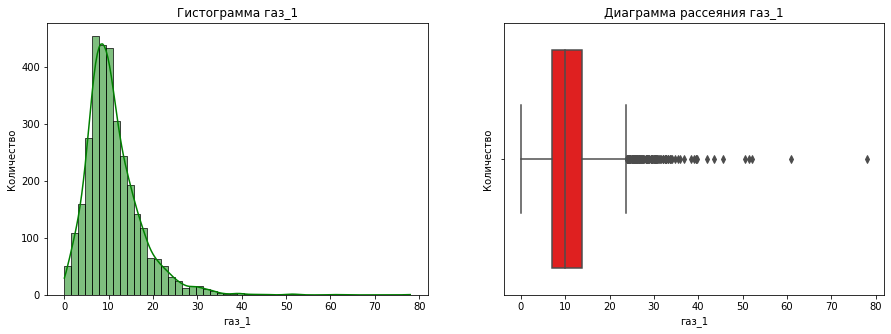

In [29]:
for column in data_gas_num:
    hist_box_plot(data_gas, column)

По диаграммам также наблюдаются выбросы, но удалять их не будем.

## 2.5 Анализ data_temp - результаты измерения температуры.

In [30]:
check_df(data_temp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


None

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,"1,571.00"
1,1,2019-05-03 11:07:18,"1,604.00"
2,1,2019-05-03 11:11:34,"1,618.00"
3,1,2019-05-03 11:18:04,"1,601.00"
4,1,2019-05-03 11:25:59,"1,606.00"


,key,Температура
count,"18,092.00","14,665.00"
mean,"1,616.46","1,590.72"
std,934.64,20.39
min,1.00,"1,191.00"
25%,807.75,"1,580.00"
50%,"1,618.00","1,590.00"
75%,"2,429.00","1,599.00"
max,"3,241.00","1,705.00"


key                0
Время замера       0
Температура     3427
dtype: int64

0

В датафрейме data_temp 18092 строк. Есть пропуски в колонке температура, удалим их. Дубликатов нет. Тип данных в колонке время не соответсвует данным. Отрицательных аномальных значений не наблюдается, но при этом есть низкие температуры близкие к температуре плавления сплава. Значения ниже 1500 удалим. Также есть ключ с одним замером температуры, который нужно удалить. Приведем к единому регистру название колонок.

Приводим к единому регистру название колонок.

In [31]:
data_temp_columns = {
    'Время замера': 'время_замера',
    'Температура': 'температура',
}

data_temp = data_temp.rename(columns=data_temp_columns)
data_temp.head()

,key,время_замера,температура
0,1,2019-05-03 11:02:04,"1,571.00"
1,1,2019-05-03 11:07:18,"1,604.00"
2,1,2019-05-03 11:11:34,"1,618.00"
3,1,2019-05-03 11:18:04,"1,601.00"
4,1,2019-05-03 11:25:59,"1,606.00"


Изменим тип данных в колонке время замера.

In [32]:
data_temp['время_замера'] = pd.to_datetime(data_temp['время_замера'], format='%Y-%m-%dT%H:%M:%S')

data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   время_замера  18092 non-null  datetime64[ns]
 2   температура   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


Удалим пропуски с колонке температура.

In [33]:
data_temp = data_temp.dropna().reset_index(drop = True)
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14665 entries, 0 to 14664
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           14665 non-null  int64         
 1   время_замера  14665 non-null  datetime64[ns]
 2   температура   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 343.8 KB


Изменим тип данных в колонке температура, чтобы избавиться от лишних нолей. 

In [34]:
data_temp['температура'] = data_temp['температура'].astype('int')

data_temp.head()

,key,время_замера,температура
0,1,2019-05-03 11:02:04,1571
1,1,2019-05-03 11:07:18,1604
2,1,2019-05-03 11:11:34,1618
3,1,2019-05-03 11:18:04,1601
4,1,2019-05-03 11:25:59,1606


Посмотрим на диаграммы распределения температур.

In [35]:
data_temp_num = ['температура']

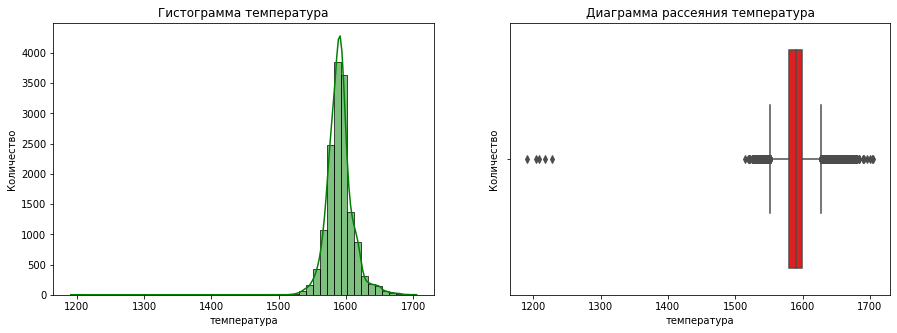

In [36]:
for column in data_temp_num:
    hist_box_plot(data_temp, column)

Удалим низкие температуры.

In [37]:
data_temp = data_temp[data_temp['температура'] >= 1500]

data_temp.describe()

,key,температура
count,"14,660.00","14,660.00"
mean,"1,325.37","1,590.85"
std,787.41,19.14
min,1.00,"1,515.00"
25%,654.00,"1,580.00"
50%,"1,314.00","1,590.00"
75%,"1,962.25","1,599.00"
max,"3,241.00","1,705.00"


Построим диаграммы без низких температур.

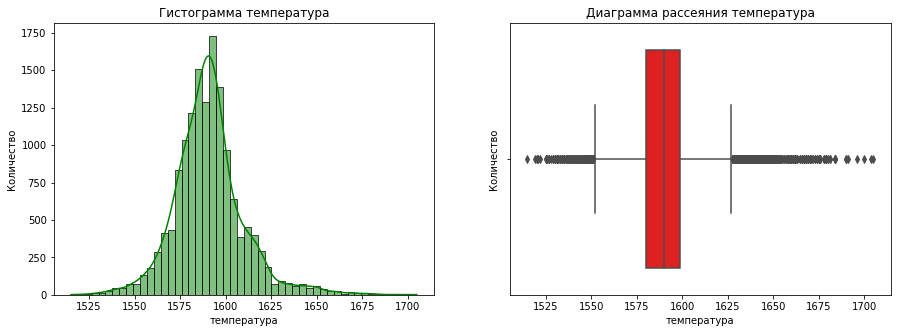

In [38]:
for column in data_temp_num:
    hist_box_plot(data_temp, column)

В данных также наблюдаются выбросы, удалять не будем.

Посчитаем количество итераций на каждую партию.

In [39]:
key_rounds = data_temp['key'].value_counts().reset_index(
    name='количество_итераций').rename(
    columns={'index': 'key'}).sort_values(
    by='key', ascending=False)

In [40]:
key_rounds.query('количество_итераций >1').head()

,key,количество_итераций
1712,2499,5
968,2498,6
2298,2497,4
602,2496,7
1420,2495,5


Начиная с партии 2500 количество измерений температуры равно единице. Удалим партии, начиная с 2500.
Также выведем время первого и последнего замера температура, первую и последнюю температуру.

In [41]:
data_temp = data_temp.groupby(by = 'key').agg(['first', 'last']).reset_index()
data_temp.columns = ['key', 'время_первого_замера', 'время_последнего_замера', 'первая_температура', 'последняя_температура']
data_temp = data_temp.query('key < 2500')

data_temp.head()

,key,время_первого_замера,время_последнего_замера,первая_температура,последняя_температура
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571,1613
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581,1602
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596,1599
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,1601,1625
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,1576,1602


## 2.6 Анализ data_wire - данные о проволочных материалах (объём).

In [42]:
check_df(data_wire)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.24,9.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,"3,081.00","3,055.00","1,079.00",63.00,14.00,1.00,73.00,11.00,19.00,29.00
mean,"1,623.43",100.90,50.58,189.48,57.44,15.13,48.02,10.04,53.63,34.16
std,933.00,42.01,39.32,99.51,28.82,NaN,33.92,8.61,16.88,19.93
min,1.00,1.92,0.03,0.14,24.15,15.13,0.03,0.23,45.08,4.62
25%,823.00,72.12,20.19,95.14,40.81,15.13,25.05,6.76,46.09,22.06
50%,"1,619.00",100.16,40.14,235.19,45.23,15.13,42.08,9.02,46.28,30.07
75%,"2,434.00",126.06,70.23,276.25,76.12,15.13,64.21,11.89,48.09,43.86
max,"3,241.00",330.31,282.78,385.01,113.23,15.13,180.45,32.85,102.76,90.05


key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

0

В датафрейме data_wire 3081 строк. Много пропусков в колонке wire, начиная с wire 3. На данном этапе пропуски заполним значением 0, после объедиения таблиц удалим признаки wire 3 - wire 9, так как в данных колонках более 80% пропусков.  Дубликатов нет. Тип данных соответсвует данным. Отрицательных аномальных значений не наблюдается. 

Приведем к единому регистру название колонок.

In [43]:
data_wire = data_wire.fillna(0)

data_wire_columns = {
    'Wire 1': 'wire_1',
    'Wire 2': 'wire_2',
    'Wire 3': 'wire_3',
    'Wire 4': 'wire_4',
    'Wire 5': 'wire_5',
    'Wire 6': 'wire_6',
    'Wire 7': 'wire_7',
    'Wire 8': 'wire_8',
    'Wire 9': 'wire_9',
}

data_wire = data_wire.rename(columns=data_wire_columns)

data_wire.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,96.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,91.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,89.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,89.24,9.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Выведем диаграммы рассеяния для всех загрузок.

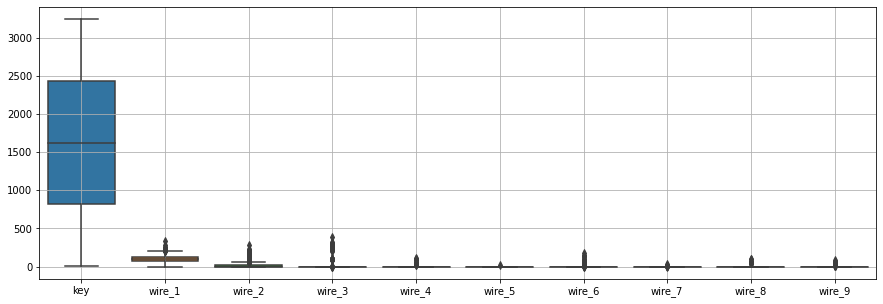

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data_wire)
plt.grid();

Как и отмечалось ранее, загрузки, начиная с wire 3, не несут никакой информации, данные будут удалены позже, после объединения таблиц.

## 2.7 Анализ data_wire_time - данные о проволочных материалах (время).

In [45]:
check_df(data_wire_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key
count,"3,081.00"
mean,"1,623.43"
std,933.00
min,1.00
25%,823.00
50%,"1,619.00"
75%,"2,434.00"
max,"3,241.00"


key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

0

Данная таблица с временем подачи в итоговую таблицу не пойдут, нужны они только для проверки корректности данных.

## 2.8 Вывод по исследовательскому анализу и предобработке данных.

Был проведен анализ следующих датафреймов:

1. В датафрейме data_arc и14876 строк, пропусков и дубликатов нет. Есть отрицательное значение реактивной мощности, что является аномалией, которую удалили. Тип данных в колонках начало и конец нагрева дугой не соответсвовал данным, изменили. Привести название колонок к единому регистру. Обнаруженные по диаграммам выбросы не удаляли.

2. В датафрейме data_bulk 3129 строк. Много пропусков, что говорит о том, что сыпучие материалы добавляли далеко не во все партии. На данном этапе пропуски заполнили значением 0, после объедиения таблиц удалим признаки bulk 1, 2, 5, 7, 8, 9, 10, 11, 13, так как в данных колонках более 80% пропусков. Дубликатов нет. Отрицательных аномальных значений не наблюдается. Привели к единому регистру название колонок. Обнаруженные по диаграммам выбросы не удаляли.

3. Данный датафрейм data_bulk_time с временем подачи в итоговую таблицу не пойдут, нужны они только для проверки корректности данных. Анализ не проводился. 

4. В датафрейме data_gas 3129 строк. Пропусков нет. Дубликатов нет. Тип данных соответсвует. Отрицательных аномальных значений не наблюдается. Привели к единому регистру название колонок. Обнаруженные по диаграммам выбросы не удаляли.

5. В датафрейме data_temp 18092 строк. Удалили пропуски в колонке температура, так как нет возможности восстановить их. Дубликатов нет. Тип данных в колонке время изменили. Отрицательных аномальных значений не наблюдается, но при этом есть низкие температуры близкие к температуре плавления сплава. Значения ниже 1500 удалили. Также есть ключ с одним замером температуры, который удалили. Привели к единому регистру название колонок.

6. В датафрейме data_wire 3081 строк. Много пропусков в колонке wire, начиная с wire 3. На данном этапе пропуски заполнили значением 0, после объедиения таблиц удалим признаки wire 3 - wire 9, так как в данных колонках более 80% пропусков. Дубликатов нет. Тип данных соответсвует данным. Отрицательных аномальных значений не наблюдается. Привели к единому регистру название колонок.

7. Данный датафрейм data_wire_time с временем подачи в итоговую таблицу не пойдут, нужны они только для проверки корректности данных. Анализ не проводился.


# 3. Объединение данных.

Теперь объединим таблицы в один датафрейм.

В итоговую таблицую войдут следующие датафреймы:

- data_arc
- data_bulk
- data_gas
- data_temp
- data_wire

При объединении данных по ключу будем использовать только INNER, чтобы выбрать только те партии, которые представлены во всех таблицах. В объединённом датафрейме по заданию должно остаться не более 2332 ключей.

In [46]:
data = (data_arc.merge(
    data_bulk, how='inner', on = 'key').merge(
    data_gas, how='inner', on = 'key').merge(
    data_temp, how='inner', on = 'key').merge(
    data_wire, how='inner', on = 'key'))

In [47]:
check_df(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   key                      2329 non-null   int64         
 1   активная_мощность        2329 non-null   float64       
 2   реактивная_мощность      2329 non-null   float64       
 3   полная_мощность          2329 non-null   float64       
 4   общее_время_нагрева      2329 non-null   int64         
 5   количество_итераций      2329 non-null   int64         
 6   bulk_1                   2329 non-null   int64         
 7   bulk_2                   2329 non-null   int64         
 8   bulk_3                   2329 non-null   int64         
 9   bulk_4                   2329 non-null   int64         
 10  bulk_5                   2329 non-null   int64         
 11  bulk_6                   2329 non-null   int64         
 12  bulk_7                   2329 non-

None

,key,активная_мощность,реактивная_мощность,полная_мощность,общее_время_нагрева,количество_итераций,bulk_1,bulk_2,bulk_3,bulk_4,...,последняя_температура,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,3.04,2.14,3.72,1098,5,0,0,0,43,...,1613,60.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,2.14,1.45,2.59,811,4,0,0,0,73,...,1602,96.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,4.06,2.94,5.02,655,5,0,0,0,34,...,1599,91.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,2.71,2.06,3.40,741,4,0,0,0,81,...,1625,89.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,2.25,1.69,2.82,869,4,0,0,0,78,...,1602,89.24,9.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,key,активная_мощность,реактивная_мощность,полная_мощность,общее_время_нагрева,количество_итераций,bulk_1,bulk_2,bulk_3,bulk_4,...,последняя_температура,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,"2,329.00","2,329.00","2,329.00","2,329.00","2,329.00","2,329.00","2,329.00","2,329.00","2,329.00","2,329.00",...,"2,329.00","2,329.00","2,329.00","2,329.00","2,329.00","2,329.00","2,329.00","2,329.00","2,329.00","2,329.00"
mean,"1,251.83",3.13,2.30,3.88,807.60,4.70,3.43,1.42,47.35,37.30,...,"1,593.37",102.44,17.61,3.23,0.31,0.00,0.98,0.01,0.31,0.32
std,714.76,1.22,0.90,1.52,340.90,1.61,12.41,19.08,75.31,58.64,...,11.20,43.54,33.62,27.94,4.76,0.00,8.69,0.21,4.40,3.46
min,1.00,0.27,0.20,0.33,57.00,1.00,0.00,0.00,0.00,0.00,...,"1,541.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,630.00,2.29,1.67,2.84,581.00,4.00,0.00,0.00,0.00,0.00,...,"1,587.00",73.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"1,255.00",3.04,2.23,3.77,778.00,5.00,0.00,0.00,0.00,0.00,...,"1,593.00",101.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"1,868.00",3.83,2.83,4.77,993.00,6.00,0.00,0.00,80.00,77.00,...,"1,598.00",128.09,23.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"2,499.00",12.38,8.95,15.29,"4,189.00",16.00,185.00,325.00,454.00,281.00,...,"1,653.00",330.31,282.78,385.01,113.23,0.00,180.45,8.49,102.76,62.03


key                        0
активная_мощность          0
реактивная_мощность        0
полная_мощность            0
общее_время_нагрева        0
количество_итераций        0
bulk_1                     0
bulk_2                     0
bulk_3                     0
bulk_4                     0
bulk_5                     0
bulk_6                     0
bulk_7                     0
bulk_8                     0
bulk_9                     0
bulk_10                    0
bulk_11                    0
bulk_12                    0
bulk_13                    0
bulk_14                    0
bulk_15                    0
газ_1                      0
время_первого_замера       0
время_последнего_замера    0
первая_температура         0
последняя_температура      0
wire_1                     0
wire_2                     0
wire_3                     0
wire_4                     0
wire_5                     0
wire_6                     0
wire_7                     0
wire_8                     0
wire_9        

0

Также по заданию необходимо, чтобы в итоговом датафрейме не осталось ключей, с номерами более чем 2500. Проверяем.

In [48]:
data.tail()

,key,активная_мощность,реактивная_мощность,полная_мощность,общее_время_нагрева,количество_итераций,bulk_1,bulk_2,bulk_3,bulk_4,...,последняя_температура,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
2324,2495,3.17,2.21,3.87,723,4,0,0,21,0,...,1591,89.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2325,2496,4.17,2.87,5.07,940,6,0,0,0,63,...,1591,114.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2326,2497,3.61,2.45,4.36,569,3,0,0,0,85,...,1589,94.09,9.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2327,2498,3.20,2.24,3.91,750,5,0,0,90,0,...,1594,118.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2328,2499,1.74,1.30,2.17,883,4,0,0,47,0,...,1603,110.16,50.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00


После объединения данных получили датафрейм с количеством 2329 строк.

# 4. Исследовательский анализ и предобработка данных объединённого датафрейма.

Удалим колонку key, время_первого_замера и время_последнего_замера, а также колонки wire 3-9 и bulk 1, 2, 5, 7, 8, 9, 10, 11, 13, как было оговорено ранее.

In [49]:
data = data.drop(['key',
                  'время_первого_замера',
                  'время_последнего_замера',
                  'bulk_1',
                  'bulk_2',
                  'bulk_5',
                  'bulk_7',
                  'bulk_8',
                  'bulk_9',
                  'bulk_10',
                  'bulk_11',
                  'bulk_13',
                  'wire_3',
                  'wire_4',
                  'wire_5',
                  'wire_6',
                  'wire_7',
                  'wire_8',
                  'wire_9'
                 ], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   активная_мощность      2329 non-null   float64
 1   реактивная_мощность    2329 non-null   float64
 2   полная_мощность        2329 non-null   float64
 3   общее_время_нагрева    2329 non-null   int64  
 4   количество_итераций    2329 non-null   int64  
 5   bulk_3                 2329 non-null   int64  
 6   bulk_4                 2329 non-null   int64  
 7   bulk_6                 2329 non-null   int64  
 8   bulk_12                2329 non-null   int64  
 9   bulk_14                2329 non-null   int64  
 10  bulk_15                2329 non-null   int64  
 11  газ_1                  2329 non-null   float64
 12  первая_температура     2329 non-null   int64  
 13  последняя_температура  2329 non-null   int64  
 14  wire_1                 2329 non-null   float64
 15  wire

Проверяем датафрейм.

In [50]:
data.head()

,активная_мощность,реактивная_мощность,полная_мощность,общее_время_нагрева,количество_итераций,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,газ_1,первая_температура,последняя_температура,wire_1,wire_2
0,3.04,2.14,3.72,1098,5,0,43,0,206,150,154,29.75,1571,1613,60.06,0.00
1,2.14,1.45,2.59,811,4,0,73,0,206,149,154,12.56,1581,1602,96.05,0.00
2,4.06,2.94,5.02,655,5,0,34,0,205,152,153,28.55,1596,1599,91.16,0.00
3,2.71,2.06,3.40,741,4,0,81,0,207,153,154,18.84,1601,1625,89.06,0.00
4,2.25,1.69,2.82,869,4,0,78,0,203,151,152,5.41,1576,1602,89.24,9.11


Лишние колонки удалились. 

Теперь перейдем к анализу каждого признака, включая целевой.

In [51]:
data_column = ['активная_мощность',
              'реактивная_мощность',
              'полная_мощность',
              'общее_время_нагрева',
              'количество_итераций',
              'bulk_3',
              'bulk_4',
              'bulk_6',
              'bulk_12',
              'bulk_14',
              'bulk_15',
              'газ_1',
              'первая_температура',
              'последняя_температура',
              'wire_1',
              'wire_2']

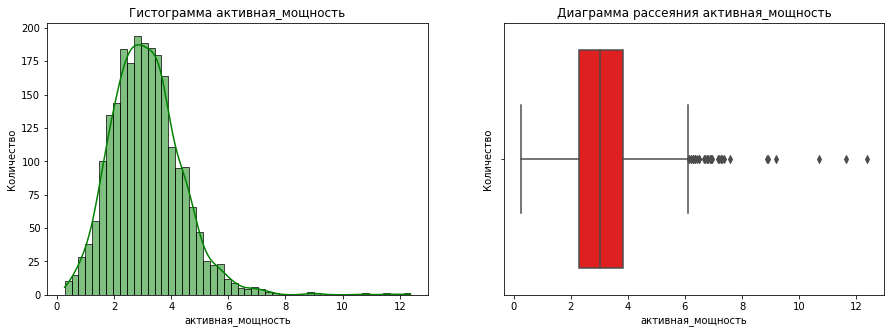

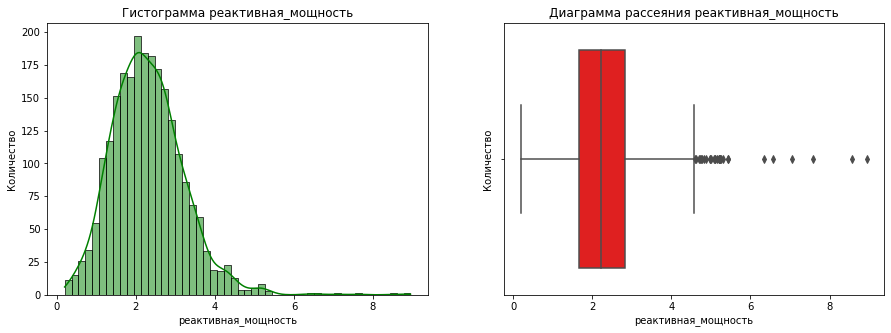

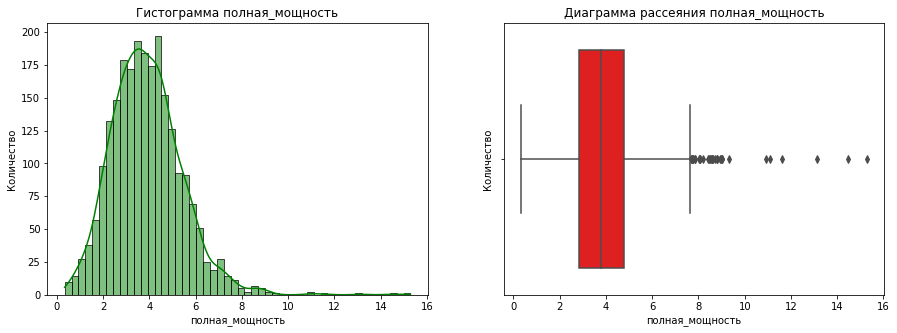

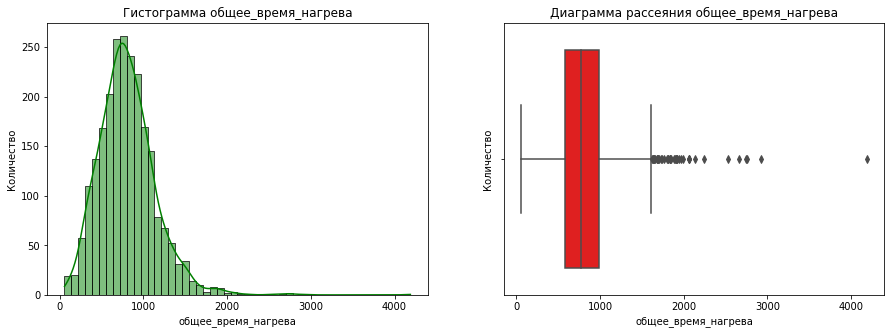

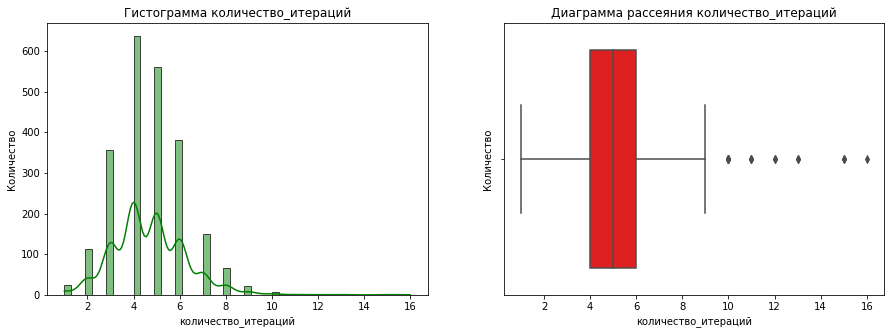

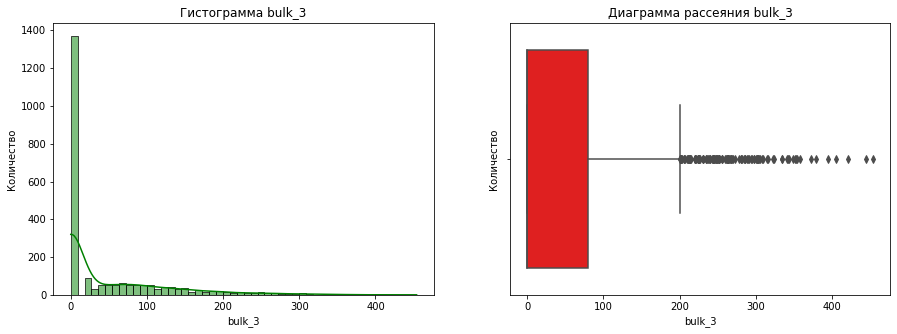

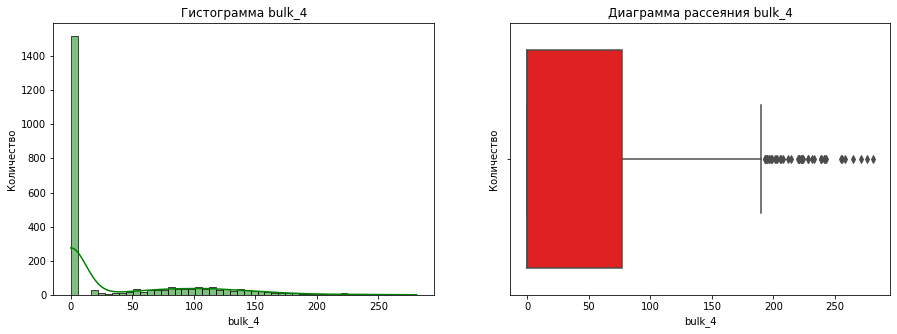

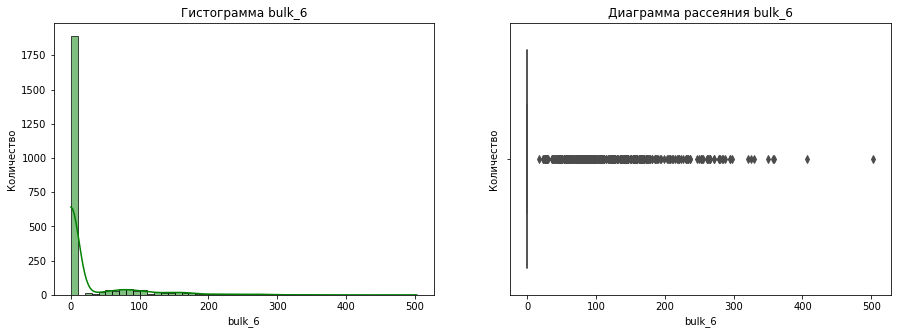

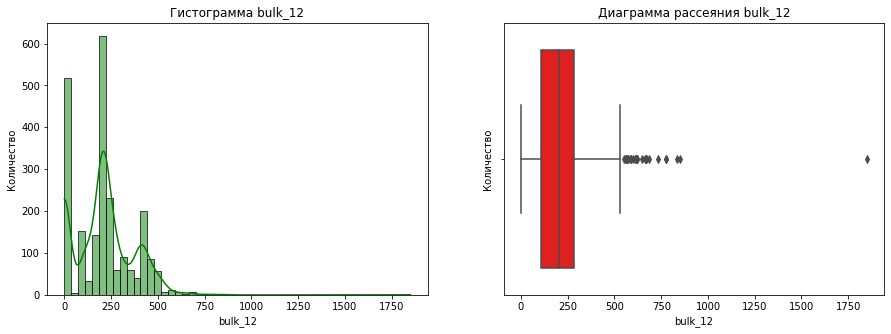

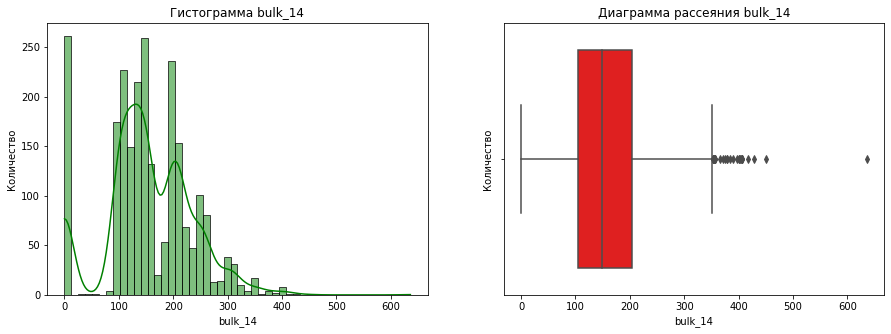

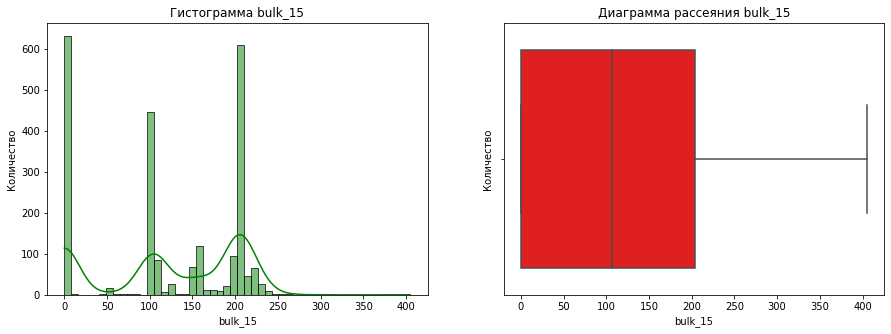

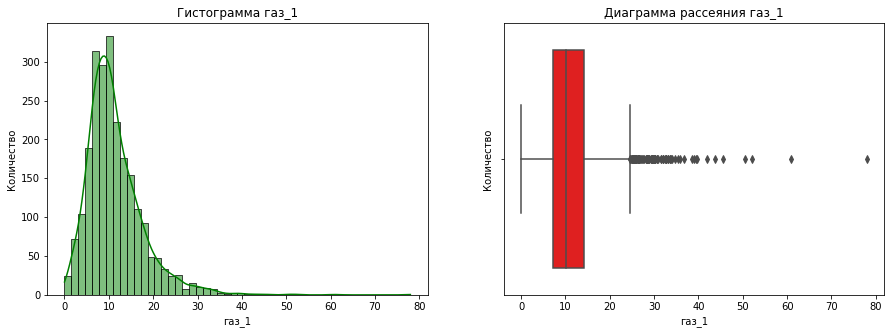

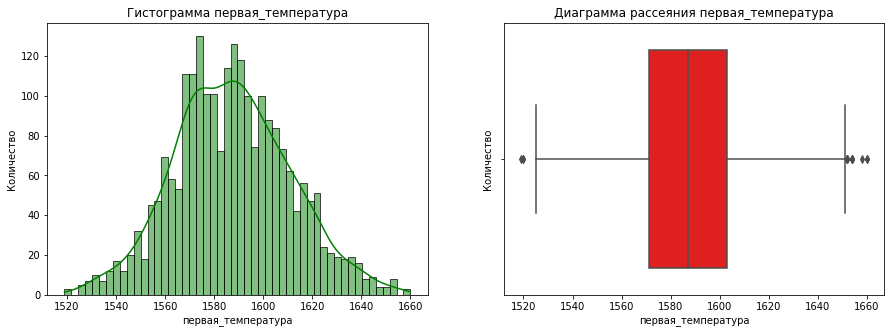

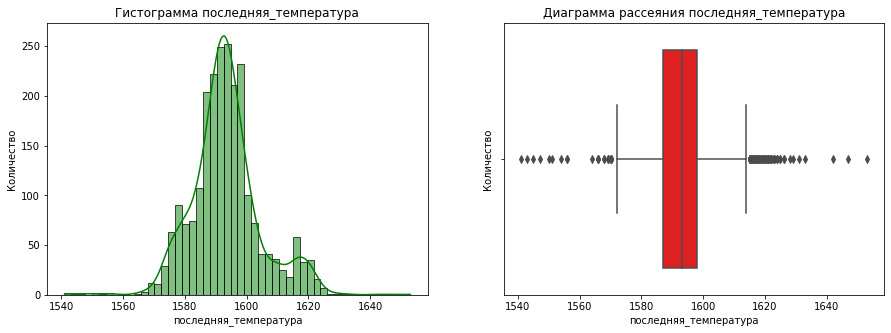

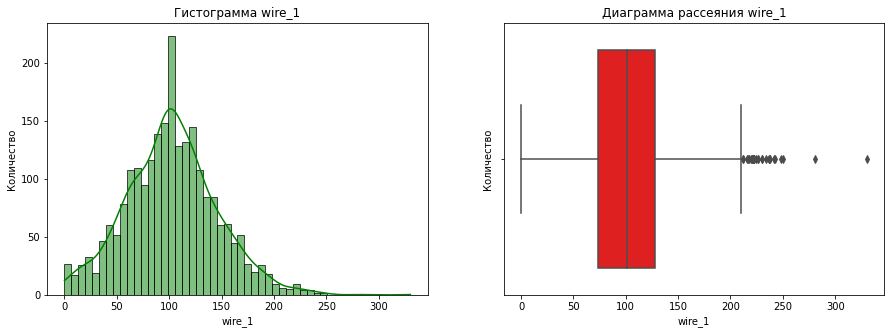

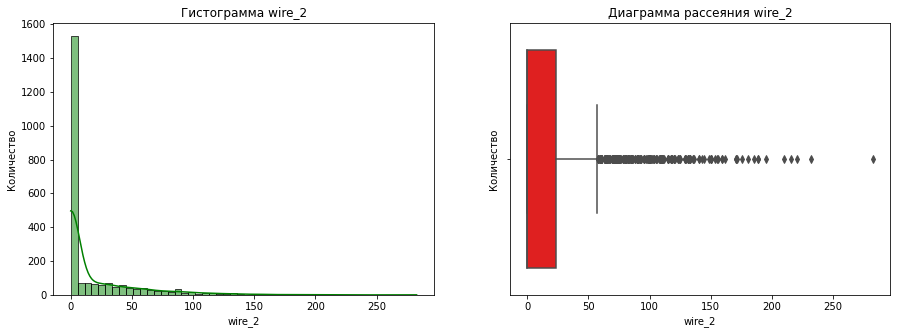

In [52]:
for column in data_column:
    hist_box_plot(data, column)

Диаграммы активной, реактивной и полной мощности практически идентичны, с небольшими отклонениями. Наблюдаются выбросы, начиная с 6 у активной мощности, с 4,5 у реактивной мощности, и с 8 у полной мощности. Все значения оставим в датафреймах.

Диаграммы общего времени нагрева: наблюдаются выбросы, начиная с 1600. В большинстве случаев общее время нагрева происходит в промежутке от 300 до 1100.

В большинстве случаев количество итераций находится в диапазоне от 3 до 6 раз. Реже всего количестве итераций превышает значение 10 и выше.

По диаграммам добавления сыпучих материалов bulk, меньше всего добавлялось материалов в bulk 3,4,6, больше в 12,14 и 15. Много выбросов в bulk 3,4,6, но удалять их не будем.

В диаграммах газ наблюдаются выбросы, начиная со значения 25, удалять не будем. В большинстве случаев при продувке используется объем газа в диапазоне от 5 до 15. 

В диаграммах первой температуры выбросов совсем мало. В большинстве случае первая температура колеблется в диапазоне от 1570 до 1610 градусов.

В диаграммах последней температуры выбросов гораздо больше, оставим данные. В большинстве случае последняя температура колеблется в диапазоне от 1590 до 1600 градусов.

В диаграммах о подаче проволочных материалах в wire 1 имеются выбросы, начиная со значения 210. В большинстве случаев проволочные материалы добавляются в объеме от 75 до 135. В wire 2 много выбросов. Мало данных, возможно и этот признак можно было удалить, но все же оставим его в итоговой таблице.

Проведем корреляционный анализ признаков.

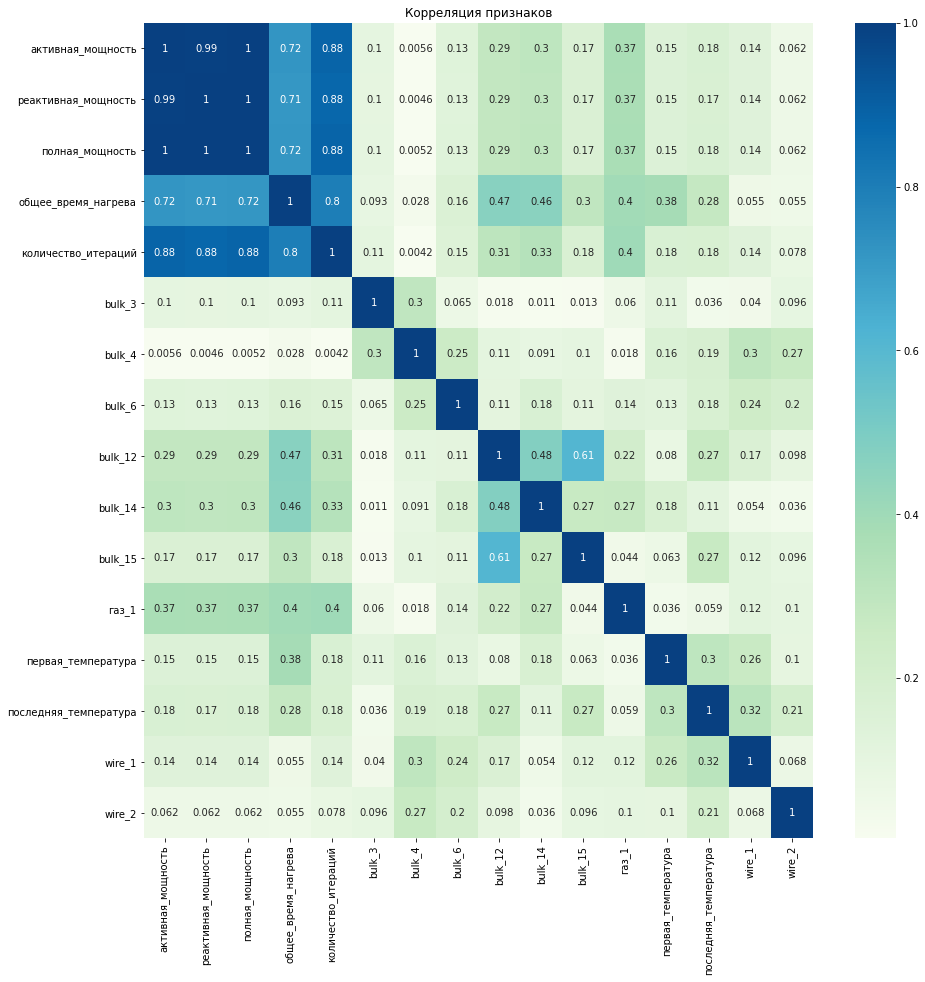

In [53]:
plt.figure(figsize=(15, 15))

fig = sns.heatmap(data.corr().abs(), cmap='GnBu', annot=True)
plt.title('Корреляция признаков')
plt.show()

Если не брать во внимание активную, реактивную, полную мощность, которые зависят друг от друга, и, соответсвенно, имеют высокую корреляцию, то наблюдается достаточно высокая корреляция между следующими признаками:

1. Все виды мощностей(активная, реактивная, полная) коррелируют с общим временем нагрева, коэффициент корреляции 0,71-0,72
2. Все виды мощностей(активная, реактивная, полная) коррелируют с количеством итераций, коэффициент корреляции 0,88

Для всех остальных признаков корреляция слабая. 

# 5. Подготовка данных.

Разбивает датафрейм на обучающие и тестовые данные в размере 75 на 25 %.

In [54]:
features = data.drop(columns='последняя_температура')
target = data['последняя_температура']

features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=0.25,
    random_state=RANDOM_STATE
)


print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(1746, 15)
(583, 15)
(1746,)
(583,)


# 6. Обучение моделей машинного обучения.

## 6.1 Обучение модели DecisionTreeRegressor

Обучим модель с использованием подбора гиперпараметров. Выведем лучшую метрику.

In [55]:
model = DecisionTreeRegressor(random_state=RANDOM_STATE)

param_grid = { 
    'max_depth' : range(3, 16, 3),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_cv = GridSearchCV(
    model, 
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3, 
    n_jobs=-1,
    verbose=1
)

model_cv.fit(features_train, target_train)

print('Гиперпараметры', model_cv.best_params_)
print(f'MAE для модели DecisionTreeRegressor: {round(model_cv.best_score_*-1, 2)}')

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Гиперпараметры {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}
MAE для модели DecisionTreeRegressor: 7.51


## 6.2 Обучение модели RandomForestRegressor

Обучим модель с использованием подбора гиперпараметров. Выведем лучшую метрику.

In [56]:
model = RandomForestRegressor(random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': range(5, 30, 5),
    'max_depth': range(1, 15, 2),
    'min_samples_leaf': range(1,5),
}

model_cv = RandomizedSearchCV(
    model, 
    param_grid,
    scoring='neg_mean_absolute_error',
    cv=3, 
    n_jobs=-1,
    verbose=1,
    n_iter=10
)

model_cv.fit(features_train, target_train)

print('Гиперпараметры', model_cv.best_estimator_)
print(f'MAE для модели RandomForestRegressor: {round(model_cv.best_score_*-1, 2)}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Гиперпараметры RandomForestRegressor(max_depth=11, n_estimators=25, random_state=130125)
MAE для модели RandomForestRegressor: 6.65


## 6.3 Обучение модели CatBoostRegressor

Обучим модель с использованием подбора гиперпараметров. Выведем лучшую метрику.

In [57]:
model = CatBoostRegressor(random_state=RANDOM_STATE)

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 500]
}

model_cv = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        scoring='neg_mean_absolute_error',
                        cv=3,
                        n_jobs=-1,
                        verbose=3)

model_cv.fit(features_train, target_train)
        
print('Гиперпараметры', model_cv.best_params_)
print(f'MAE для модели CatBoostRegressor: {round(model_cv.best_score_*-1, 2)}')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
0:	learn: 11.1154950	total: 48.1ms	remaining: 4.76s
1:	learn: 11.0945857	total: 49.7ms	remaining: 2.44s
2:	learn: 11.0706463	total: 51.1ms	remaining: 1.65s
3:	learn: 11.0473353	total: 52.5ms	remaining: 1.26s
4:	learn: 11.0239834	total: 53.8ms	remaining: 1.02s
5:	learn: 11.0044440	total: 55.2ms	remaining: 864ms
6:	learn: 10.9820789	total: 56.5ms	remaining: 750ms
7:	learn: 10.9562797	total: 57.9ms	remaining: 665ms
8:	learn: 10.9377194	total: 59.2ms	remaining: 598ms
9:	learn: 10.9166956	total: 60.6ms	remaining: 546ms
10:	learn: 10.8967402	total: 61.9ms	remaining: 501ms
11:	learn: 10.8766332	total: 63.1ms	remaining: 463ms
12:	learn: 10.8575060	total: 64.5ms	remaining: 431ms
13:	learn: 10.8417273	total: 65.6ms	remaining: 403ms
14:	learn: 10.8211305	total: 67.1ms	remaining: 380ms
15:	learn: 10.8012275	total: 68.4ms	remaining: 359ms
16:	learn: 10.7832645	total: 69.6ms	remaining: 340ms
17:	learn: 10.7651329	total: 70.9ms	remaining: 3

# 7. Выбор лучшей модели и проверка качества на тестовых данных.

Объединим полученные метрики в таблицу для наглядности.

In [58]:
data_mae = [["DecisionTreeRegressor", "7.51"],
            ["RandomForestRegressor", "6.65"],
            ["CatBoostRegressor", "6.37"]]
                   
df_rmse = pd.DataFrame(data_mae, columns=["модель", "MAE"])
df_rmse

,модель,MAE
0,DecisionTreeRegressor,7.51
1,RandomForestRegressor,6.65
2,CatBoostRegressor,6.37


Очевидно, что лучшей моделью является модель CatBoostRegressor, МАЕ метрика которой составляет 6,37 на тренировочных данных.

Проверим метрику МАЕ на тестовых данных, а также посчитаем метрику R2.

In [59]:
model_cbr = CatBoostRegressor(random_state=RANDOM_STATE,
                              max_depth=6,
                              iterations=100,
                              learning_rate=0.1)

model_cbr.fit(features_train, target_train)

prediction = model_cbr.predict(features_test)

mae = mean_absolute_error(target_test, prediction)

r2 = r2_score(target_test, prediction)

print(f'MAE лучшей модели на тестовых данных: {round(mae, 2)}')
print(f'R2 лучшей модели на тестовых данных: {round(r2, 2)}')

0:	learn: 10.9273639	total: 3.69ms	remaining: 365ms
1:	learn: 10.6676974	total: 7.06ms	remaining: 346ms
2:	learn: 10.4605749	total: 10.4ms	remaining: 336ms
3:	learn: 10.2504808	total: 13.6ms	remaining: 326ms
4:	learn: 10.0722265	total: 16.7ms	remaining: 318ms
5:	learn: 9.8969822	total: 20ms	remaining: 314ms
6:	learn: 9.7355095	total: 23.2ms	remaining: 309ms
7:	learn: 9.5972111	total: 26.5ms	remaining: 305ms
8:	learn: 9.4740892	total: 30.9ms	remaining: 313ms
9:	learn: 9.3888191	total: 35.9ms	remaining: 323ms
10:	learn: 9.2854689	total: 39.6ms	remaining: 320ms
11:	learn: 9.1929831	total: 42.7ms	remaining: 313ms
12:	learn: 9.0957729	total: 45.9ms	remaining: 307ms
13:	learn: 9.0098160	total: 49ms	remaining: 301ms
14:	learn: 8.9349178	total: 52.4ms	remaining: 297ms
15:	learn: 8.8768136	total: 55.6ms	remaining: 292ms
16:	learn: 8.8038470	total: 59.1ms	remaining: 289ms
17:	learn: 8.7419103	total: 62.7ms	remaining: 285ms
18:	learn: 8.7032855	total: 65.9ms	remaining: 281ms
19:	learn: 8.6491281	

Метрика МАЕ на тестовых данных составила 6,19, что отвечают условию задания - метрика на тестовых данных не должна быть выше 6,8. Метрика R2 составляет 0.44, что говорит не о лучшим работе модели. Согласно данном метрике модель работает в 44% случаев. Для улучшения метрик возможно стоит удалить выбросы, удалить некоторые признаки. Какие именно, проверим после исследования важности признаков.

# 8. Сравнение с константной моделью DummyRegressor.

In [60]:
model_dmr = DummyRegressor(strategy='mean', constant=None, quantile=None)

model_dmr.fit(features_train, target_train)
 
predict_dmr = model_dmr.predict(features_test) 

print("r2_score для модели DummyRegressor: {:.2f}".format(r2_score(target_test, predict_dmr))) 

r2_score для модели DummyRegressor: -0.00


# 9. Исследование важности признаков.

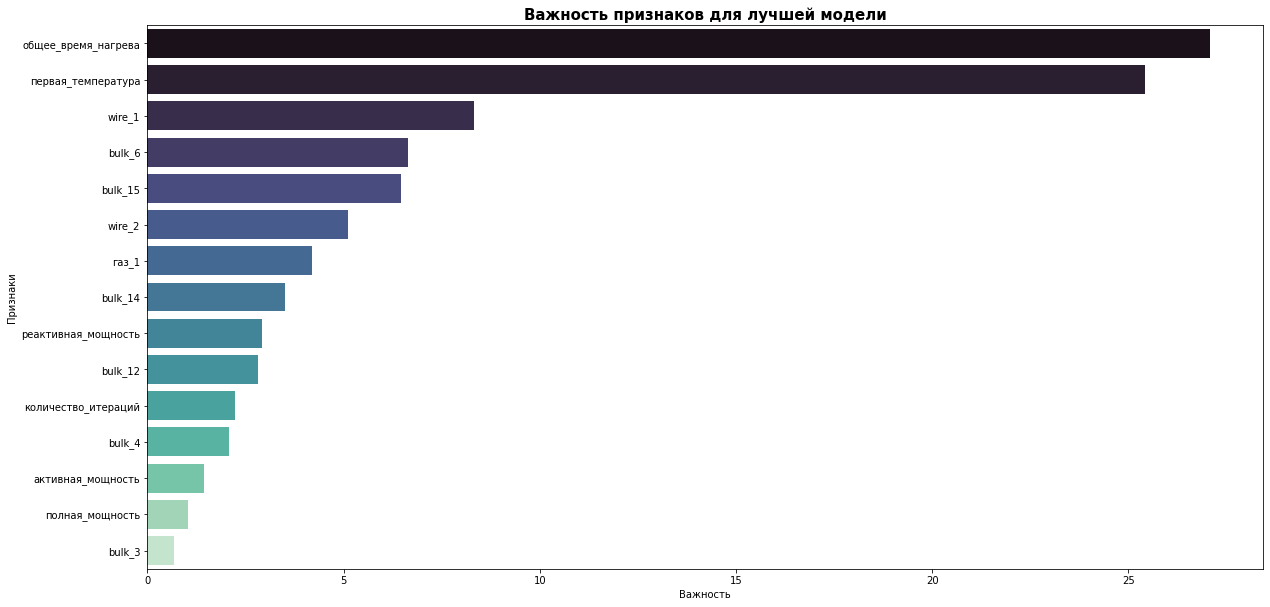

In [61]:
features_imp = {
    'features': features_test.columns,
    'feature_importances': model_cbr.feature_importances_,
}

features_imp = pd.DataFrame(features_imp)

features_imp.sort_values(
    by='feature_importances',
    ascending=False,
    inplace=True
)

plt.figure(figsize=(20, 10))
sns.barplot(x=features_imp['feature_importances'], y=features_imp['features'], palette = 'mako')
plt.title('Важность признаков для лучшей модели', fontsize=15, fontweight='bold')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

Наиболее ТОП-5 важных признаков:

1. Общее время нагрева
2. Первая температура
3. Wire_1
4. Bulk_6
5. Bulk_15

Наимее ТОП-5 важных признаков:
1. Количество итераций
2. Bulk_4
3. Активная мощность
4. Полная мощность
5. Bulk_3

Как мы видим, новые добавленные признаки, такие как общее время нагрева и первая температура, являются одними из важных, на основании которых получили лучшую модель для предсказания температуы сплава.

# 10. Общий вывод.

Изначально было дано 7 датафреймов. 

**Этапы работы:**

1. Был проведен их анализ датафреймов:

- В датафрейме data_arc и14876 строк, пропусков и дубликатов нет. Есть отрицательное значение реактивной мощности, что является аномалией, которую удалили. Тип данных в колонках начало и конец нагрева дугой не соответсвовал данным, изменили. Привести название колонок к единому регистру. Обнаруженные по диаграммам выбросы не удаляли.

- В датафрейме data_bulk 3129 строк. Много пропусков, что говорит о том, что сыпучие материалы добавляли далеко не во все партии. На данном этапе пропуски заполнили значением 0, после объедиения таблиц удалим признаки bulk 1, 2, 5, 7, 8, 9, 10, 11, 13, так как в данных колонках более 80% пропусков. Дубликатов нет. Отрицательных аномальных значений не наблюдается. Привели к единому регистру название колонок. Обнаруженные по диаграммам выбросы не удаляли.

- Данный датафрейм data_bulk_time с временем подачи в итоговую таблицу не пойдут, нужны они только для проверки корректности данных. Анализ не проводился.

- В датафрейме data_gas 3129 строк. Пропусков нет. Дубликатов нет. Тип данных соответсвует. Отрицательных аномальных значений не наблюдается. Привели к единому регистру название колонок. Обнаруженные по диаграммам выбросы не удаляли.

- В датафрейме data_temp 18092 строк. Удалили пропуски в колонке температура, так как нет возможности восстановить их. Дубликатов нет. Тип данных в колонке время изменили. Отрицательных аномальных значений не наблюдается, но при этом есть низкие температуры близкие к температуре плавления сплава. Значения ниже 1500 удалили. Также есть ключ с одним замером температуры, который удалили. Привели к единому регистру название колонок.

- В датафрейме data_wire 3081 строк. Много пропусков в колонке wire, начиная с wire 3. На данном этапе пропуски заполнили значением 0, после объедиения таблиц удалим признаки wire 3 - wire 9, так как в данных колонках более 80% пропусков. Дубликатов нет. Тип данных соответсвует данным. Отрицательных аномальных значений не наблюдается. Привели к единому регистру название колонок.

- Данный датафрейм data_wire_time с временем подачи в итоговую таблицу не пойдут, нужны они только для проверки корректности данных. Анализ не проводился.

2. Далее объединили данные, провели обработку и анализ общего датафрейма.

3. Обучили три модели DecisionTreeRegressor, RandomForestRegressor и CatBoostRegressor.

4. Лучшей моделью окалась модель CatBoostRegressor. Лучшие гиперпараметры для модели: max_depth=6, iterations=100, learning_rate=0.1, RANDOM_STATE=130125. Метрика МАЕ на тренировочныхданных составила 6,37. Метрика МАЕ на тестовых данных составила 6,19, что отвечают условию задания - метрика на тестовых данных не должна быть выше 6,8. Метрика R2 составляет 0.44, что говорит не о лучшим работе модели. Согласно данном метрике модель работает в 44% случаев.

5. При исследование важности признаков получили:

Наиболее ТОП-5 важных признаков:

1. Общее время нагрева
2. Первая температура
3. Wire_1
4. Bulk_6
5. Bulk_15

Наимее ТОП-5 важных признаков:

1. Количество итераций
2. Bulk_4
3. Активная мощность
4. Полная мощность
5. Bulk_3

Выяснили, что новые добавленные признаки, такие как общее время нагрева и первая температура, являются одними из важных, на основании которых получили лучшую модель для предсказания температуы сплава.

Для улучшения работы модели возможно стоит удалит выбросы в 10 наиболее важных признаках, что улучшит ее метрики. В целом данная модель CatBoostRegressor может быть рекомендована для бизнеса.